**BÀI 2 : FUZZY LOGIC**
- Mang tính định tính : logic mờ
- Mang tính định lượng : rõ ràng

In [2]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 32.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=e804728acad6f72ca3adcba84af9a12d1626b6413f78287077bcd2120c846261
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [ ]:
x = np.arange(11)   #[0,10]
mfx = fuzz.trimf(x,[0,5,10])
print(x)
print(mfx)

[ 0  1  2  3  4  5  6  7  8  9 10]
[0.  0.2 0.4 0.6 0.8 1.  0.8 0.6 0.4 0.2 0. ]


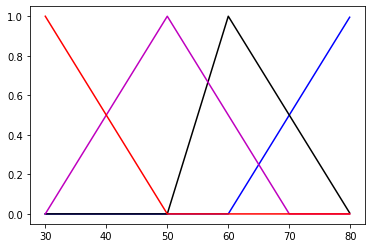

In [4]:
x = np.arange(30,80,0.1)
slow = fuzz.trimf(x,[30,30,50])
medium = fuzz.trimf(x,[30,50,70])
medium_fast = fuzz.trimf(x,[50,60,80])
full_speed = fuzz.trimf(x,[60,80,80])
plt.figure()
plt.plot(x,full_speed,'b',linewidth=1.5,label='Full Speed')
plt.plot(x,medium_fast,'k',linewidth=1.5,label='Medium Fast')
plt.plot(x,medium,'m',linewidth=1.5,label='Medium Powered')
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')

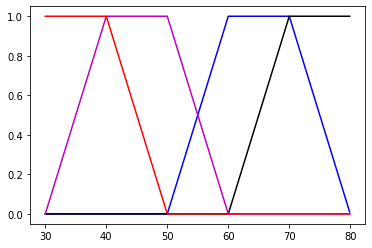

In [6]:
#HÌnh Thang
x = np.arange(30,80,0.1)
slow = fuzz.trapmf(x,[30,30,40,50])
medium = fuzz.trapmf(x,[30,40,50,60])
medium_fast = fuzz.trapmf(x,[60,70,80,80])
full_speed = fuzz.trapmf(x,[50,60,70,80])
plt.figure()
plt.plot(x,full_speed,'b',linewidth=1.5,label='Full Speed')
plt.plot(x,medium_fast,'k',linewidth=1.5,label='Medium Fast')
plt.plot(x,medium,'m',linewidth=1.5,label='Medium Powered')
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')

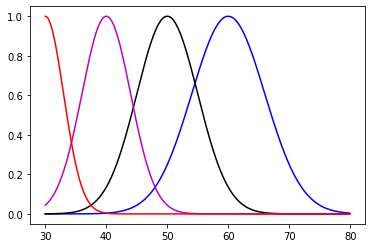

In [ ]:
#.gaussmf(x,a,c) với c là phương sai . Nên cho c nhỏ <10
x = np.arange(30,80,0.1)
slow = fuzz.gaussmf(x,30,3)
medium = fuzz.gaussmf(x,40,4)
medium_fast = fuzz.gaussmf(x,50,5)
full_speed = fuzz.gaussmf(x,60,6)
plt.figure()
plt.plot(x,full_speed,'b',linewidth=1.5,label='Full Speed')
plt.plot(x,medium_fast,'k',linewidth=1.5,label='Medium Fast')
plt.plot(x,medium,'m',linewidth=1.5,label='Medium Powered')
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')

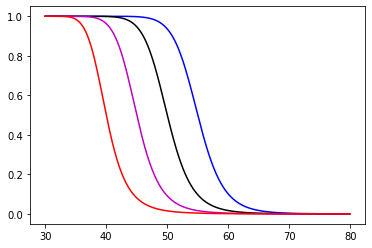

In [ ]:
#Hình chuông - Bell
#.gbellmf(x,b,c,a)
#b = độ rộng đường cong
#c = độ dốc
#a = tâm
x = np.arange(30,80,0.1)
slow = fuzz.gbellmf(x,10,3,30)
medium = fuzz.gbellmf(x,15,4,30)
medium_fast = fuzz.gbellmf(x,20,5,30)
full_speed = fuzz.gbellmf(x,25,6,30)
plt.figure()
plt.plot(x,full_speed,'b',linewidth=1.5,label='Full Speed')
plt.plot(x,medium_fast,'k',linewidth=1.5,label='Medium Fast')
plt.plot(x,medium,'m',linewidth=1.5,label='Medium Powered')
plt.plot(x,slow,'r',linewidth=1.5,label='Slow')

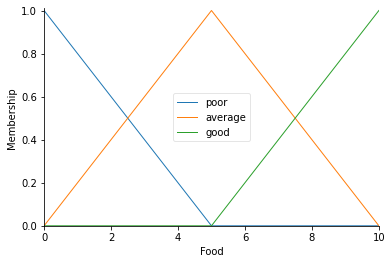

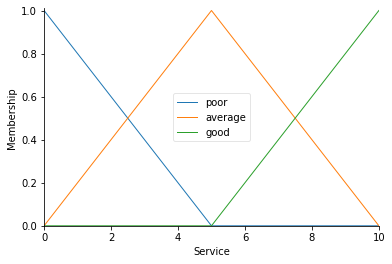

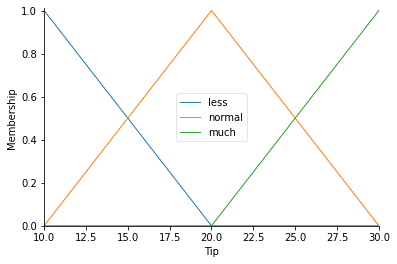

In [ ]:
#input
#(0,11,1) : [0,10], độ phân giải = 1
#.automf(n) với n=3,5,7 (ko phải số chẵn)
food = ctrl.Antecedent(np.arange(0,11,1),'Food')
service = ctrl.Antecedent(np.arange(0,11,1),'Service')
#output
tip = ctrl.Consequent(np.arange(10,31,1),'Tip')

#.universe = gán giá trị từ Antecedent
food['poor'] = fuzz.trimf(food.universe,[0,0,5])
food['average'] = fuzz.trimf(food.universe,[0,5,10])
food['good'] = fuzz.trimf(food.universe,[5,10,10])

service['poor'] = fuzz.trimf(service.universe,[0,0,5])
service['average'] = fuzz.trimf(service.universe,[0,5,10])
service['good'] = fuzz.trimf(service.universe,[5,10,10])

tip['less'] = fuzz.trimf(tip.universe,[10,10,20])
tip['normal'] = fuzz.trimf(tip.universe,[10,20,30])
tip['much'] = fuzz.trimf(tip.universe,[20,30,30])

food.view()
service.view()
tip.view()

#food['average'].view()

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fc842d357c0>)

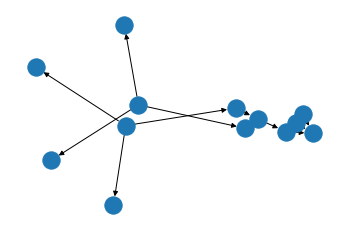

In [ ]:
rule_1 = ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule_2 = ctrl.Rule(food['poor'] & service['average'], tip['less'])
rule_3 = ctrl.Rule(food['poor'] & service['good'], tip['normal'])

rule_4 = ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule_5 = ctrl.Rule(food['average'] & service['average'], tip['normal'])
rule_6 = ctrl.Rule(food['average'] & service['good'], tip['much'])

rule_7 = ctrl.Rule(food['good'] & service['poor'], tip['less'])
rule_8 = ctrl.Rule(food['good'] & service['average'], tip['much'])
rule_9 = ctrl.Rule(food['good'] & service['good'], tip['much'])

rule_1.view()

25.515706032513773


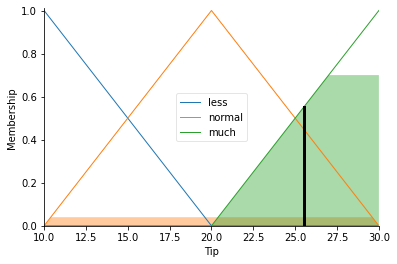

In [ ]:
tipping_ctrl = ctrl.ControlSystem([rule_1, rule_2, rule_3, rule_4, rule_5, rule_6, rule_7, rule_8, rule_9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
#Ở đây, giả sử cho biến vào là bấy nhiêu điểm đó
#Tuy nhiên, đối với cảm biến, ta dùng để đọc đầu vào, chứ không gán giá trị được
#Lưu ý : tên biến trong ['...'] phải là tên biến trong hàm .Antecedent() ở bên trên
tipping.input['Food'] = 6.5
tipping.input['Service'] = 9.8
tipping.compute()
print(tipping.output['Tip'])
tip.view(sim=tipping)